In [1]:
import math
import tensorflow as tf
from sklearn import tree
from statistics import mean
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
get_ipython().run_line_magic('matplotlib', 'inline')

import sys
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.svm import SVC
from keras.models import Sequential
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split

from keras.layers import Activation,BatchNormalization
from keras.layers.core import Dense,Dropout
from sklearn.metrics import plot_roc_curve
from keras.metrics import categorical_crossentropy
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier



In [3]:
Data = pd.read_csv("PhishingData.csv",header="infer")

In [4]:
x=Data.iloc [:,1:-1]
x=x.values
y=Data.iloc[:,-1].values

In [5]:
dimension = Data.shape[1] - 1
print(dimension)

9


In [6]:
np.set_printoptions(threshold=sys.maxsize)
#print(y)

In [7]:
y = np.where(y >= 0, 1, -1)
#print(y)

# Evalution Function

In [8]:
def evaluation(clf, X, Y):
    print(f'Accuracy')
    acc = cross_val_score(clf, X, Y, scoring="accuracy", cv = 5)
    print(acc)
    print("Accuracy Score (Mean): ", acc.mean())
    print("Standard Error: ", acc.std())
    

    print(f'\nF1 Score')
    f1_score = cross_val_score(clf, X, Y, scoring="f1", cv = 5)
    print(f1_score)
    print("F1 Score (Mean): ", f1_score.mean())
    print("Standard Error: ", f1_score.std())
    
    print(f'\nPrecision')
    pre = cross_val_score(clf, X, Y, scoring="precision", cv = 5)
    print(pre)
    print("Precision (Mean): ", pre.mean())
    print("Standard Error: ", pre.std())
    
    print(f'\nSensitivity')
    rec = cross_val_score(clf, X, Y, scoring="recall", cv = 5)
    print(rec)
    print("Recall (Mean): ", rec.mean())
    print("Standard Error: ", rec.std())
    

# Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

# Decision tree

## Hyperparameter Tuning in Decision Trees

In [10]:
def hyperParameterTuning_DecisionTree(features, labels):
    params = {
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_leaf": [3, 4, 5],
        "min_samples_split": [8, 10, 12],
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 20, 30, 40, 50],
        "random_state": [10, 20, 30, 40, 50]
    }
    
    rf_model = DecisionTreeClassifier()
    
    gsearch = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
    
    gsearch.fit(features,labels)
    
    return gsearch.best_params_

In [11]:
hyperParameterTuning_DecisionTree(X_train, y_train)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'random_state': 10}

In [11]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=20, max_features='log2',
                                      min_samples_leaf = 5, min_samples_split = 12, random_state = 10 )

In [12]:
evaluation(clf_tree, X_test, y_test)

Accuracy
[0.88235294 0.80882353 0.89705882 0.80882353 0.76119403]
Accuracy Score (Mean):  0.8316505706760318
Standard Error:  0.05070550598607944

F1 Score
[0.87878788 0.77966102 0.8852459  0.77966102 0.73333333]
F1 Score (Mean):  0.8113378295317724
Standard Error:  0.060172177300261254

Precision
[0.80555556 0.79310345 0.87096774 0.79310345 0.70967742]
Precision (Mean):  0.7944815226795205
Standard Error:  0.05131921678871988

Sensitivity
[0.96666667 0.76666667 0.9        0.76666667 0.75862069]
Recall (Mean):  0.8317241379310344
Standard Error:  0.0856506190138484


# K-Nearest Neighbors

In [13]:
def hyperParameterTuning_KNN(features, labels):
    params = {
        "n_neighbors": [3, 5, 8, 10, 13],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree"],
        "metric": ["minkowski", "euclidean", "manhattan"],
        "p": [1, 2, 3, 4, 5]
    }
    
    rf_model = KNeighborsClassifier()
    
    gsearch = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
    
    gsearch.fit(features,labels)
    
    return gsearch.best_params_

In [15]:
hyperParameterTuning_KNN(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


{'algorithm': 'ball_tree',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [14]:
clf_KNN = KNeighborsClassifier(algorithm = "ball_tree", metric = "minkowski", n_neighbors = 5, p = 1, weights = "uniform")

In [15]:
evaluation(clf_KNN, X_test, y_test)

Accuracy
[0.86764706 0.73529412 0.89705882 0.82352941 0.79104478]
Accuracy Score (Mean):  0.8229148375768217
Standard Error:  0.056906539782953396

F1 Score
[0.86153846 0.7        0.8852459  0.79310345 0.77419355]
F1 Score (Mean):  0.8028162719681531
Standard Error:  0.06592074700178284

Precision
[0.8        0.7        0.87096774 0.82142857 0.72727273]
Precision (Mean):  0.7839338081273566
Standard Error:  0.062440768190013415

Sensitivity
[0.93333333 0.7        0.9        0.76666667 0.82758621]
Recall (Mean):  0.8255172413793103
Standard Error:  0.08531616454316067


# Random Forest  

In [16]:
def hyperParameterTuning_RF(features, labels):
    params = {
        "n_estimators": [30, 50, 70, 100],
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 20, 30, 40, 50],
        "random_state": [10, 20, 30, 40, 50]
    }
    
    rf_model = RandomForestClassifier()
    
    gsearch = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
    
    gsearch.fit(features,labels)
    
    return gsearch.best_params_

In [19]:
hyperParameterTuning_RF(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 100,
 'random_state': 10}

In [17]:
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=100, random_state=10)

In [18]:
evaluation(clf_rf, X_test, y_test)

Accuracy
[0.91176471 0.83823529 0.85294118 0.82352941 0.80597015]
Accuracy Score (Mean):  0.8464881474978052
Standard Error:  0.0361651544294734

F1 Score
[0.90322581 0.79245283 0.83870968 0.79310345 0.8       ]
F1 Score (Mean):  0.8254983524671019
Standard Error:  0.04244454864563457

Precision
[0.875      0.91304348 0.8125     0.82142857 0.72222222]
Precision (Mean):  0.8288388543823327
Standard Error:  0.0646687664277084

Sensitivity
[0.93333333 0.7        0.86666667 0.76666667 0.89655172]
Recall (Mean):  0.8326436781609197
Standard Error:  0.08640314826205352


# Support Vector Machine

In [19]:
def hyperParameterTuning_SVC(features, labels):
    params = {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": [1, 3, 5],
        "random_state": [10, 20, 30, 40, 50]
    }
    
    rf_model = SVC()
    
    gsearch = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
    
    gsearch.fit(features,labels)
    
    return gsearch.best_params_

In [23]:
hyperParameterTuning_SVC(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'C': 5, 'kernel': 'rbf', 'random_state': 10}

In [20]:
clf_svm = SVC(random_state = 10, kernel = 'rbf', C = 5)

In [21]:
evaluation(clf_svm, X_test, y_test)

Accuracy
[0.88235294 0.80882353 0.77941176 0.83823529 0.82089552]
Accuracy Score (Mean):  0.8259438103599649
Standard Error:  0.034108330702000714

F1 Score
[0.87878788 0.75471698 0.74576271 0.80701754 0.80645161]
F1 Score (Mean):  0.7985473457094472
Standard Error:  0.04749754367212168

Precision
[0.80555556 0.86956522 0.75862069 0.85185185 0.75757576]
Precision (Mean):  0.8086338144059285
Standard Error:  0.04625613066956867

Sensitivity
[0.96666667 0.66666667 0.73333333 0.76666667 0.86206897]
Recall (Mean):  0.799080459770115
Standard Error:  0.10484220507059143


# Artificial Neural Network

In [25]:
def hyperParameterTuning_MLP(features, labels):
    params = {
        "hidden_layer_sizes": [(50,50,50), (50,100,50), (100,)],
        "activation": ['tanh', 'relu'],
        "max_iter": [500, 600, 800, 1000],
        "learning_rate": ['constant','adaptive', "invscaling"],
        "random_state": [10, 20, 30, 40, 50]
    }
    
    rf_model = MLPClassifier()
    
    gsearch = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
    
    gsearch.fit(features,labels)
    
    return gsearch.best_params_

In [37]:
hyperParameterTuning_MLP(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


{'activation': 'tanh',
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'max_iter': 500,
 'random_state': 30}

In [26]:
clf_mlp = MLPClassifier(activation = "tanh", hidden_layer_sizes = (50, 100, 50), learning_rate = "constant", 
                         max_iter = 500, random_state = 30) 

In [27]:
evaluation(clf_mlp, X_test, y_test)

Accuracy
[0.86764706 0.76470588 0.75       0.80882353 0.82089552]
Accuracy Score (Mean):  0.8024143985952591
Standard Error:  0.04196934650962467

F1 Score
[0.85245902 0.7037037  0.73015873 0.77966102 0.80645161]
F1 Score (Mean):  0.774486816021651
Standard Error:  0.05311009849628017

Precision
[0.83870968 0.79166667 0.6969697  0.79310345 0.75757576]
Precision (Mean):  0.7756050493814677
Standard Error:  0.04702113908748374

Sensitivity
[0.86666667 0.63333333 0.76666667 0.76666667 0.86206897]
Recall (Mean):  0.7790804597701149
Standard Error:  0.08498101565370474


# ROC Curve

In [40]:
def roc_curve_normal(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    
    clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=20, max_features='log2',
                                      min_samples_leaf = 5, min_samples_split = 12, random_state = 10 )
    clf_tree.fit(X_train, y_train)
    #Curve Point
    #y_score1 = clf_random.predict_proba(X_test)[:,1]
    #false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    #print(false_positive_rate1, true_positive_rate1, threshold1)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    clf_KNN = KNeighborsClassifier(algorithm = "ball_tree", metric = "minkowski", n_neighbors = 5, p = 1, weights = "uniform")
    clf_KNN.fit(X_train, y_train)
    
    clf_rf = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=100, random_state=10)
    clf_rf.fit(X_train, y_train)
    
    clf_svm = SVC(random_state = 10, kernel = 'rbf', C = 5)
    clf_svm.fit(X_train, y_train)
    
    clf_mlp = MLPClassifier(activation = "tanh", hidden_layer_sizes = (50, 100, 50), learning_rate = "constant", 
                         max_iter = 500, random_state = 30) 
    clf_mlp.fit(X_train, y_train)
    
    
    ax = plt.gca()
    
    clf_tree_disp = plot_roc_curve(clf_tree, X_test, y_test, ax=ax, alpha=0.8)
    clf_KNN_disp  = plot_roc_curve(clf_KNN, X_test, y_test, ax=ax, alpha=0.8)
    clf_rf_disp   = plot_roc_curve(clf_rf, X_test, y_test, ax=ax, alpha=0.8)
    clf_svm_disp  = plot_roc_curve(clf_svm, X_test, y_test, ax=ax, alpha=0.8)
    clf_mlp_disp  = plot_roc_curve(clf_mlp, X_test, y_test, ax=ax, alpha=0.8)
    
    ax.figure.set_size_inches(20, 12)
    plt.show()

C:\Users\SAFIAL ISLAM AYON\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SAFIAL ISLAM AYON\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SAFIAL ISLAM AYON\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions 

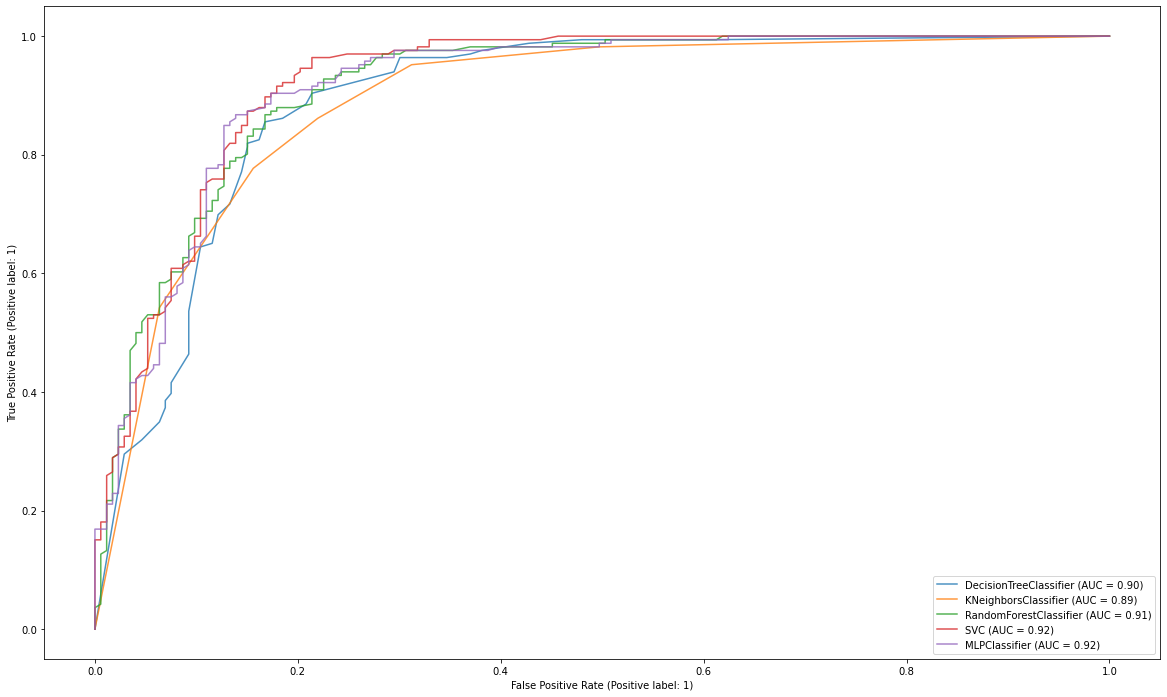

In [41]:
roc_curve_normal(x, y) 